In this exercise, we will implement and explore the K-Means clustering algorithm. It starts by creating a dataset with four two-dimensional Gaussian distributions and then applying the K-Means algorithm to this data for different values ​​of k (number of clusters). Furthermore, the degree of overlap of the distributions is varied by manipulating the standard deviation, and again applying K-Means for different values ​​of k. The objective is to understand how the K-Means algorithm behaves with different data configurations, number of clusters and degrees of overlap.

Below are the libraries used to solve this exercise


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

First, a function called k_means is created, which is precisely the K-Means algorithm that will be implemented in this exercise.


In [ ]:
def k_means(X, k, max_iters=100):
  np.random.seed(0)
  centers = X[np.random.choice(X.shape[0], k, replace=False)]
  for _ in range(max_iters):
    dist = np.linalg.norm(X[:, np.newaxis] - centers, axis=2)
    labels = np.argmin(dist, axis=1)
    new_centers = np.array([X[labels == i].mean(axis=0) for i in range(k)])
    if np.all(centers == new_centers):
      break
    centers = new_centers
  return centers, labels

The other declared function refers to the generated data, this code was not a function at first, but as we are going to test 3 different cases (varying the standard deviation), we decided to create a function that receives the standard deviation as a parameter to simplify understanding the code

In [ ]:
def create_gaussians(std):
  np.random.seed(0)
  nc = 100
  xc1 = np.random.randn(nc, 2) * std + np.array([2, 2])
  xc2 = np.random.randn(nc, 2) * std + np.array([4, 4])
  xc3 = np.random.randn(nc, 2) * std + np.array([2, 4])
  xc4 = np.random.randn(nc, 2) * std + np.array([4, 2])
  data = np.vstack([xc1, xc2, xc3, xc4])
  return data

Finally we have the main part of the code, where the data is generated and the parameters varied, the final plot can be interpreted as the line being the standard deviation values ​​and the columns referring to the number of clusters (K)

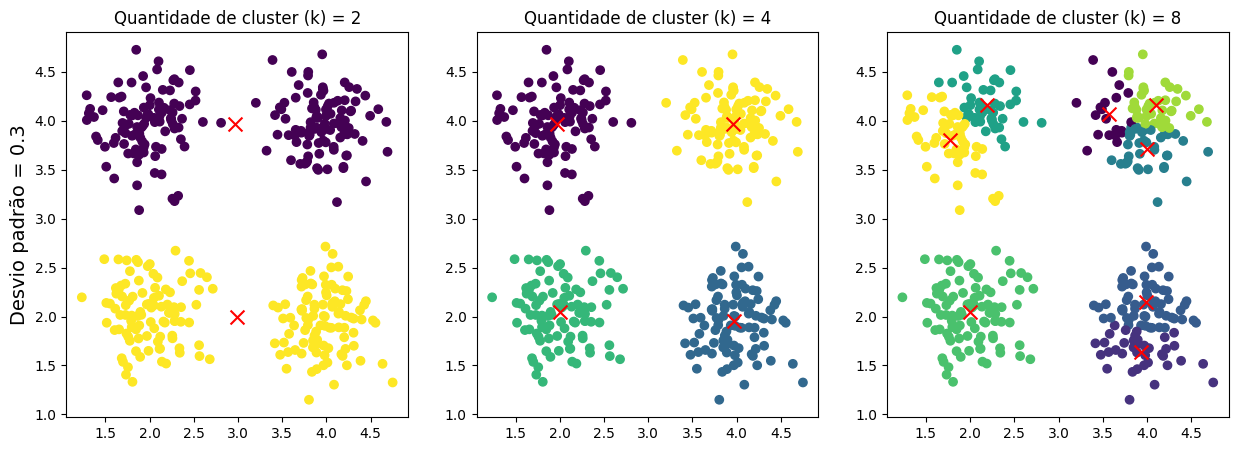

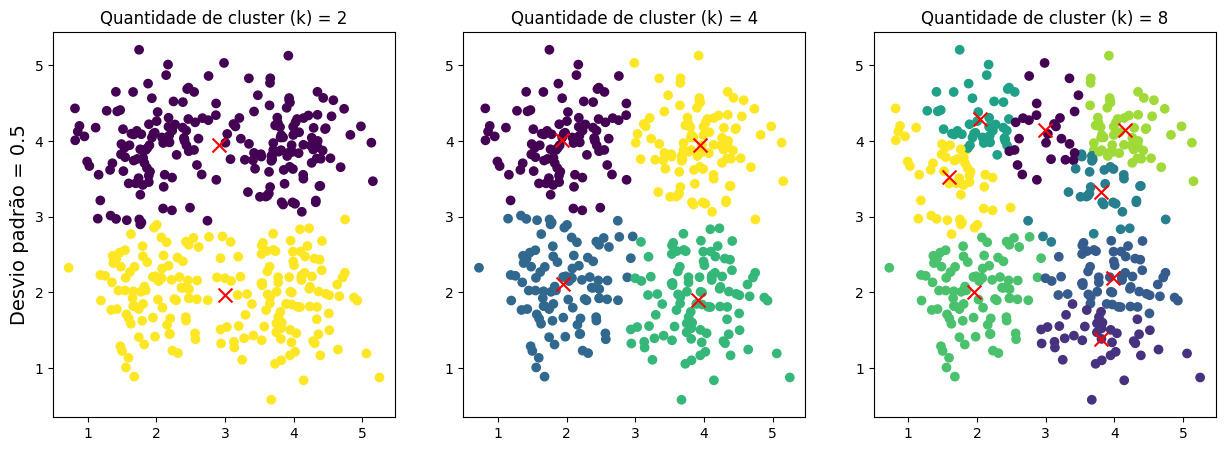

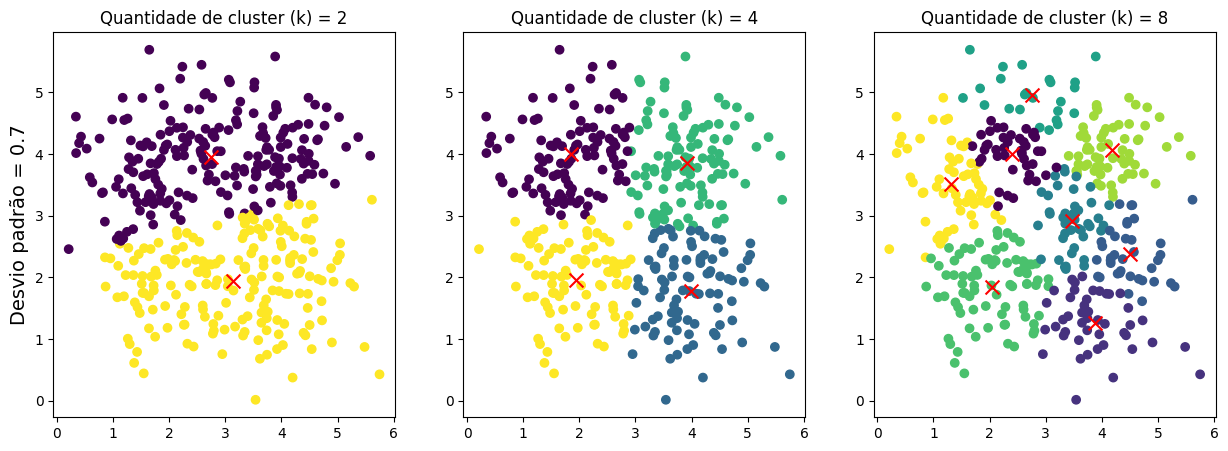

In [ ]:
for std_dev in [0.3, 0.5, 0.7]:
  fig, axes = plt.subplots(1, 3, figsize=(15, 5))

  for i, k in enumerate([2, 4, 8]):
    data = create_gaussians(std_dev)
    centers, labels = k_means(data, k)

    ax = axes[i]
    ax.scatter(data[:, 0], data[:, 1], c=labels)
    ax.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=100)
    ax.set_title(f'Quantidade de cluster (k) = {k}')
    if(k==2): ax.set_ylabel(f'Desvio padrão = {std_dev}', fontsize=14)

  plt.show()

As we can see above, each cluster has the ability to classify the samples in its own way, for the first case of standard deviation = 0.3, the samples are very well separated and it is easy to organize, but the first solution did not have the ability to classify correctly due to the low value of K. The other 2 can classify well, even though when k=8 some groups are divided

As the standard deviation increases, samples from different classes tend to get closer, to the point that the problem creates classification regions that group 2 or more different classes (as can be seen in the other 2 cases where k=8)